## 1. EXPLORATORY DATA ANALYSIS:

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# Function for Loading features, labels:
def get_DF_data():
    df_tr = pd.read_csv("Data_CSVs/training_set_features.csv",index_col='respondent_id')
    df_tr.fillna(np.nan)
    df_lbl = pd.read_csv("Data_CSVs/training_set_labels.csv",index_col='respondent_id')
    df_com = pd.DataFrame.join(df_tr,df_lbl)
    return(df_tr,df_lbl,df_com)

# Function to load test data set:
def get_DF_test():
    df_test = pd.read_csv('Data_CSVs/test_set_features.csv',index_col='respondent_id')
    df_test.fillna(np.nan)
    return df_test

### Checking the Data:

In [3]:
df_tr,df_lbl,df_com = get_DF_data()

In [4]:
df_lbl.shape

(26707, 2)

In [5]:
df_lbl.isnull().sum()

h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

In [6]:
df_lbl.head(2)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1


In [7]:
df_tr.shape

(26707, 35)

In [8]:
df_tr.dropna(how='any').shape

(6437, 35)

**It is not possible to remove all the columns with null values since we are left with 23% of the whole data. So we will use different methods to fill Null values in this work.**

In [9]:
df_tr.head(2)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe


In [10]:
df_tr.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [11]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker        

*Checking the data in the table:*

/var/folders/99/ns2bjzxd70xch1fw_63n29kw0000gn/T/ipykernel_45626/3194141262.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_tr.hist(ax=ax)


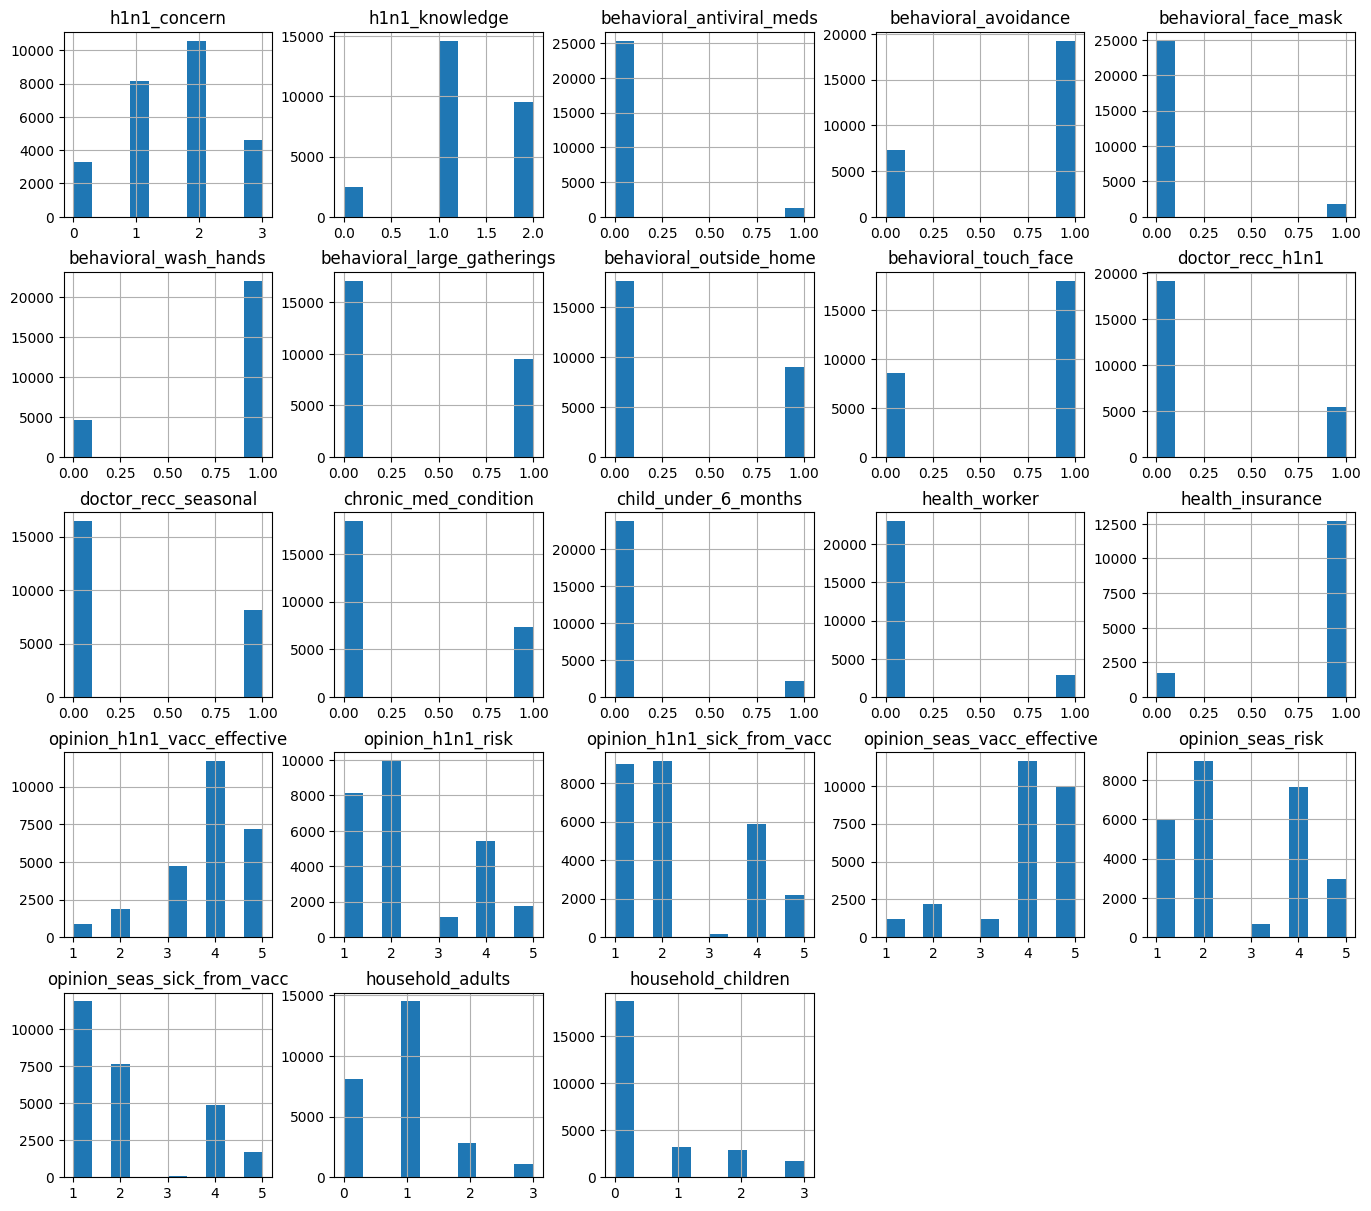

In [12]:
fig, ax = plt.subplots()
fig.tight_layout(pad=-25.)
df_tr.hist(ax=ax)
plt.show()

In [13]:
df_tr.describe().T

,count,mean,std,min,25%,50%,75%,max
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0
doctor_recc_h1n1,24547.0,0.220312,0.414466,0.0,0.0,0.0,0.0,1.0


**`Most of the data in the table are either boolean or categorical with only acouple of columns including integer numbers between 0 and 5 (categorical).`**


### Feature importance and correlations:

#### Cheking how each feature affect the percentage of people vaccinated

In [14]:
col_ex='h1n1_vaccine'
val_cnts = df_com[col_ex].value_counts()
print(f' {col_ex} {1}  >> percent vaccinated      ',val_cnts[1]/(val_cnts[0]+val_cnts[1])*100)
# print(f' {col_ex} {0}  >> percent Not vaccinated  ',val_cnts[0]/(val_cnts[0]+val_cnts[1])*100)
print(30*'--')
print('correlation between features and h1n1_vaccine ')
cols = df_com.columns
for col_ex in cols[:]:
    counts = df_com.groupby(col_ex)['h1n1_vaccine'].value_counts()
    try:
        indexes = set([ii[:][0] for ii in counts.index ])
        print(10*'########') 
        for i in (indexes):   
            print(f' {col_ex} {i}  >> percent vaccinated      ',(counts[i,1]/(counts[i,0]+counts[i,1]))*100)
            print(10*'------')
    except:
        print(10*'-----') 
        print(f' {col_ex} failed')

 h1n1_vaccine 1  >> percent vaccinated       21.24536638334519
------------------------------------------------------------
correlation between features and h1n1_vaccine 
################################################################################
 h1n1_concern 0.0  >> percent vaccinated       13.561893203883496
------------------------------------------------------------
 h1n1_concern 1.0  >> percent vaccinated       17.1347970072366
------------------------------------------------------------
 h1n1_concern 2.0  >> percent vaccinated       23.38534278959811
------------------------------------------------------------
 h1n1_concern 3.0  >> percent vaccinated       29.209322587671533
------------------------------------------------------------
################################################################################
 h1n1_knowledge 0.0  >> percent vaccinated       14.405426975259378
------------------------------------------------------------
 h1n1_knowledge 1.0  >> percent v

As we can see from the table the vacciantion percentage is more sensitive to features like: </br> *h1n1_concern, h1n1_knowledge, doctor_recc_h1n1, doctor_recc_seasonal, health_worker* </br>
while other features like: </br>
*household_children, household_adults, census_msa,* </br>
does not affect the vaccination percentage much

In [15]:
col_ex='seasonal_vaccine'
val_cnts = df_com[col_ex].value_counts()
print(f' {col_ex} {1}  >> percent vaccinated      ',val_cnts[1]/(val_cnts[0]+val_cnts[1]))
# print(f' {col_ex} {0}  >> percent Not vaccinated  ',val_cnts[0]/(val_cnts[0]+val_cnts[1]))
print(30*'--')
print('correlation between features and seasonal_vaccine ')
cols = df_com.columns
for col_ex in cols[:]:
    counts = df_com.groupby(col_ex)['seasonal_vaccine'].value_counts()
    try:
        indexes = set([ii[:][0] for ii in counts.index ])
        print(10*'********') 
        for i in (indexes):   
            print(10*'--')
            print(f' {col_ex} {i}  >> percent vaccinated      ',(counts[i,1]/(counts[i,0]+counts[i,1]))*100)
            #print(f' {col_ex} {i}  >> percent Not vaccinated  ',(counts[i,0]/(counts[i,0]+counts[i,1]))*100)
    except:
        print(10*'-----') 
        print(f' {col_ex} failed')

 seasonal_vaccine 1  >> percent vaccinated       0.4656082674954132
------------------------------------------------------------
correlation between features and seasonal_vaccine 
********************************************************************************
--------------------
 h1n1_concern 0.0  >> percent vaccinated       31.614077669902912
--------------------
 h1n1_concern 1.0  >> percent vaccinated       40.99104624064761
--------------------
 h1n1_concern 2.0  >> percent vaccinated       51.44208037825059
--------------------
 h1n1_concern 3.0  >> percent vaccinated       55.957307776083645
********************************************************************************
--------------------
 h1n1_knowledge 0.0  >> percent vaccinated       36.63208300079808
--------------------
 h1n1_knowledge 1.0  >> percent vaccinated       43.211398821756404
--------------------
 h1n1_knowledge 2.0  >> percent vaccinated       54.31643301359755
***********************************************

In [16]:

def group_bar_plot(data=df_com,group_col='age_group',plot_col='seasonal_vaccine',
                   xlabel='Percent of vaccinated in each group',rotation=0):
    ''' A function to plot how each feature affect percentage of one getting vaccinated'''
    col_plot = group_col
    counts = df_com.groupby(col_plot)[plot_col].value_counts()
    sorted_counts = (counts[:,1]/(counts[:,0]+counts[:,1])).sort_values(ascending=False)
    fig,ax = plt.subplots()
    sns.barplot(sorted_counts,ax=ax,alpha=0.5,orient='y')
    ax.set_xlabel(xlabel)
    plt.xticks(rotation=rotation)
    # plt.legend()
    return plt
#     plt.show()

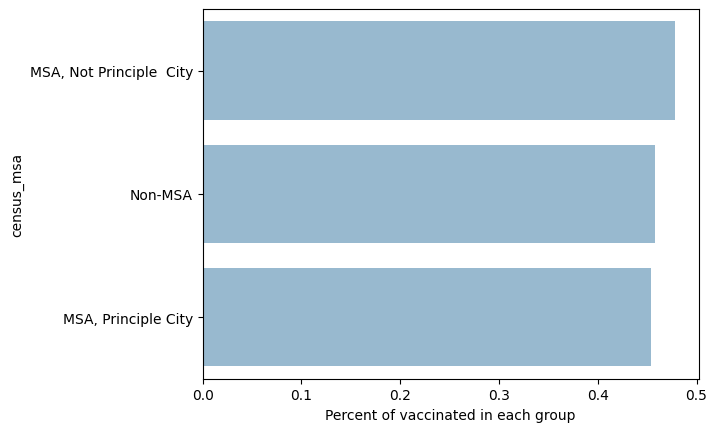

In [17]:
# age_group effects on vaccination
plot = group_bar_plot(data=df_com,group_col='census_msa',plot_col='seasonal_vaccine',
                   xlabel='Percent of vaccinated in each group',rotation=0)
plot.show()

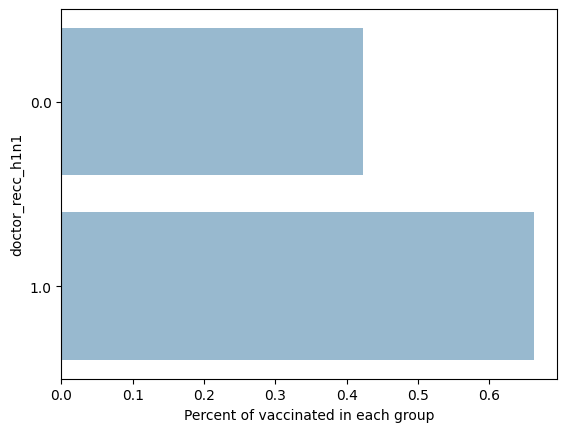

In [18]:
# age_group effects on vaccination
plot = group_bar_plot(data=df_com,group_col='doctor_recc_h1n1',plot_col='seasonal_vaccine',
                   xlabel='Percent of vaccinated in each group',rotation=0)
plot.show()

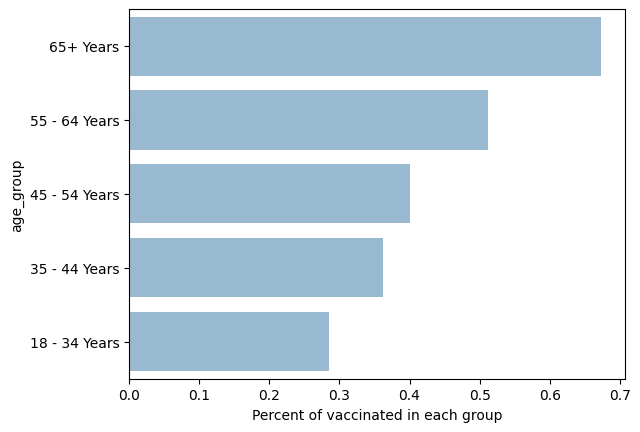

In [19]:
# age_group effects on vaccination
plot = group_bar_plot(data=df_com,group_col='age_group',plot_col='seasonal_vaccine',
                   xlabel='Percent of vaccinated in each group',rotation=0)
plot.show()

In [20]:
df_com.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

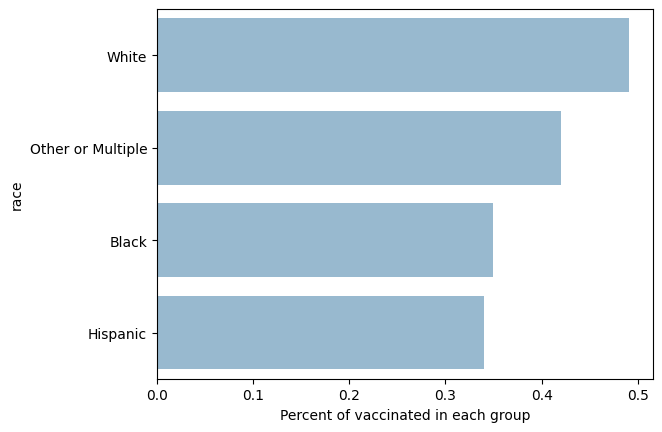

In [21]:
# Race effects on vaccination
plot = group_bar_plot(data=df_com,group_col='race',plot_col='seasonal_vaccine',
                   xlabel='Percent of vaccinated in each group',rotation=0)
plot.show()

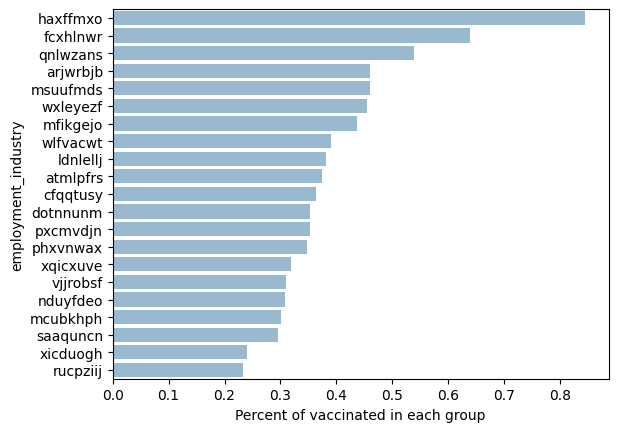

In [22]:
# employment_industry effects on vaccination
plot = group_bar_plot(data=df_com,group_col='employment_industry',plot_col='seasonal_vaccine',
                   xlabel='Percent of vaccinated in each group',rotation=0)
plot.show()

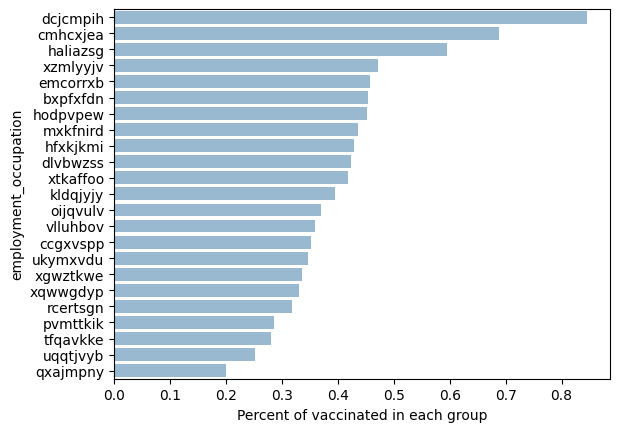

In [23]:
# employment_occupation effects on vaccination:
plot = group_bar_plot(data=df_com,group_col='employment_occupation',plot_col='seasonal_vaccine',
                   xlabel='Percent of vaccinated in each group',rotation=0)
plot.show()

#### Correlation Matrix:

In [26]:
ord_enc = OrdinalEncoder()
transformed_X = ord_enc.fit_transform(df_tr)
df_num = pd.DataFrame(transformed_X,columns=df_tr.columns,index=df_tr.index)

In [27]:
df_corr = df_num.corr()
corr_h1n1 = abs(df_num.corrwith(df_com['h1n1_vaccine'])).sort_values(ascending=False)
corr_sea = abs(df_num.corrwith(df_com['seasonal_vaccine'])).sort_values(ascending=False)
df_corr_h1n1 = pd.DataFrame([corr_h1n1],index=['h1n1_vaccine'])
df_corr_seas = pd.DataFrame([corr_sea],index=['seasonal_vaccine'])

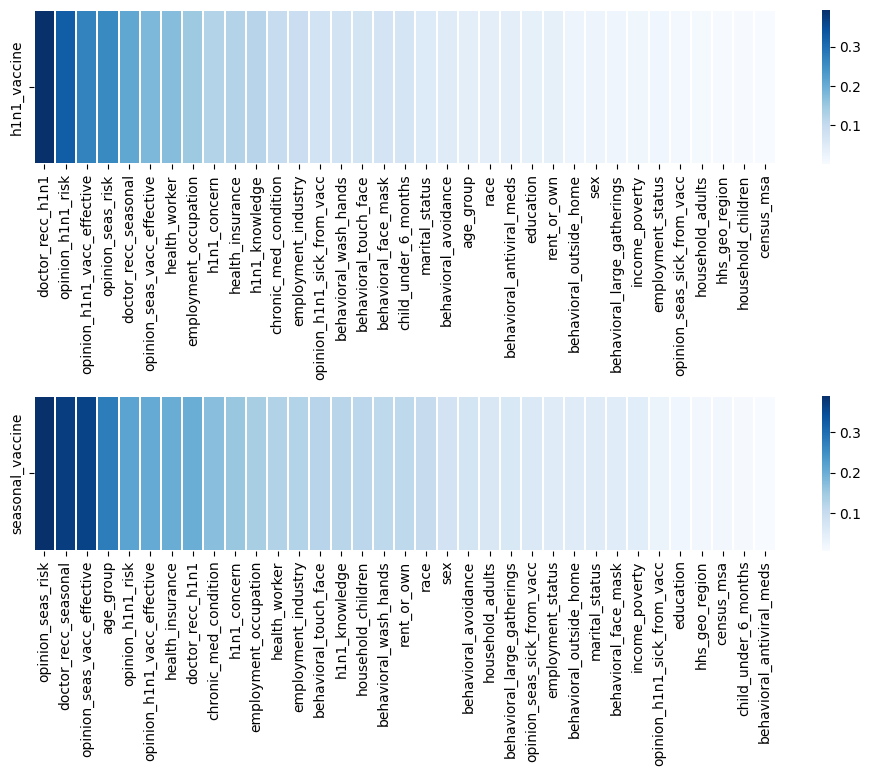

In [28]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
fig.tight_layout()
plt.subplots_adjust(hspace=1.5)

sns.heatmap(abs(df_corr_h1n1), 
            cmap='Blues', 
            linewidths=.25,ax=axs[0])
sns.heatmap(abs(df_corr_seas), 
            cmap='Blues', 
            linewidths=.25,ax=axs[1])
# plt.show()
plt.show()

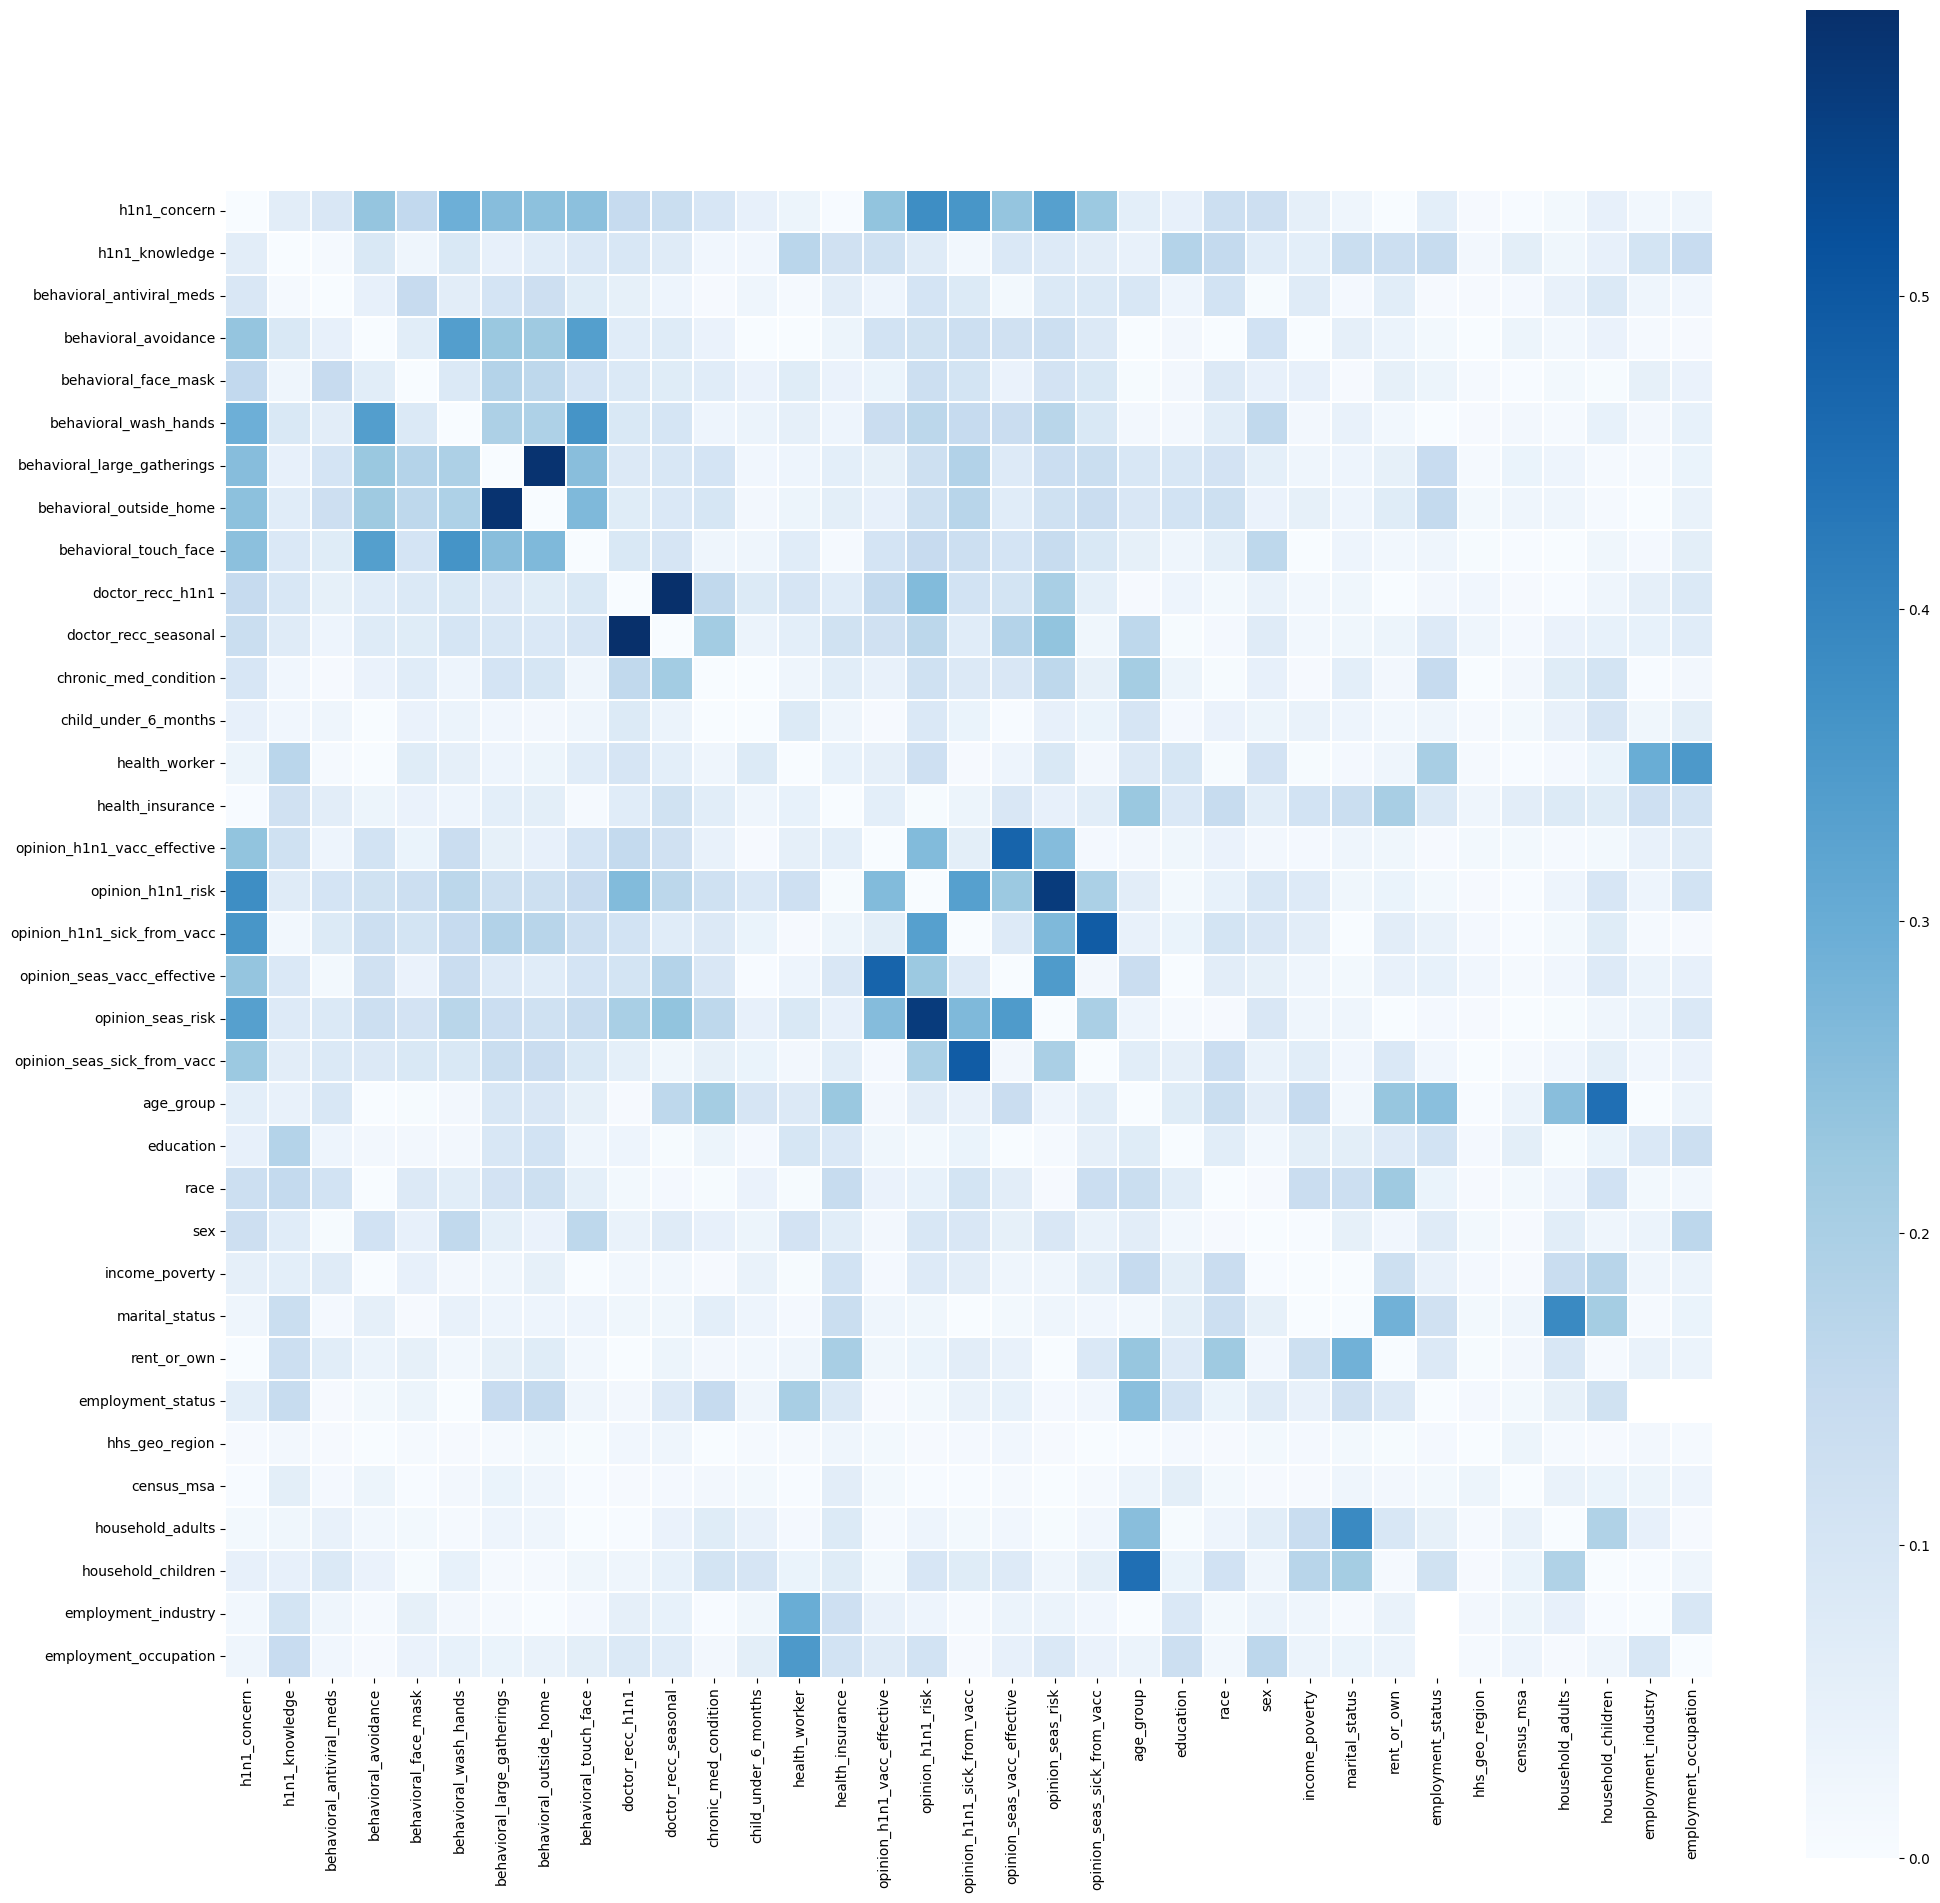

In [29]:
np.fill_diagonal(df_corr.values , 0)
fig, ax = plt.subplots(figsize=(24,24))
sns.heatmap(abs(df_corr), 
            cmap='Blues', 
            linewidths=.25,
           square=True)
plt.show()

###  EDA:  
- In this work we are going to predict the probablity of one being vaccinated (h1n1 and seasonal classification ) based on the features provided. Since different features have different corrolations with different labels (h1n1 and seasonal), this does not allow us to remove the unimportant features unless we create two different dataframes one for each label and keeping only the important features.
- In this work we are going to predict the values of missing data and the correlation plot between different features show that we can use other features to predict missing values

---
---
---